In [1]:
from keras import models
from keras import layers

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2018)

Using TensorFlow backend.


In [2]:
# constants
npts = 100 # points per blob
tot_npts = 4*npts # total number of points 
s = 0.005 # ~standard deviation
sigma = np.array([[s, 0], [0, s]]) #cov matrix

In [3]:
def plot_data(X, y,title_str):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    plt.figure(figsize=(20,10))
    plt.scatter(X[y==0,0], X[y==0,1],c='r', s=200, alpha=0.4)
    plt.scatter(X[y==1,0], X[y==1,1],c='b', s=200, alpha=0.4)
    plt.title(title_str,fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlim(amin, amax)
    plt.ylim(bmin, bmax)
    plt.grid('on')
    plt.show()

In [4]:
# Generate Data
from sklearn.datasets import make_classification, make_moons, make_circles
X, y = make_circles(n_samples=250, noise=0.05, factor=0.3, random_state=0)

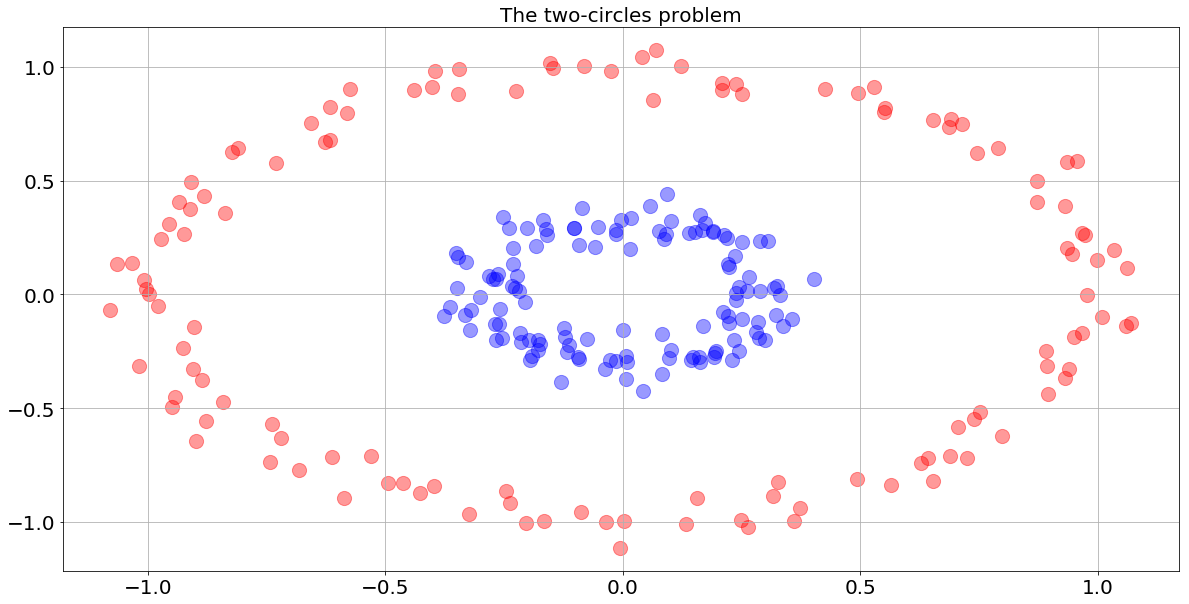

In [5]:
plot_data(X, y,'The two-circles problem')

In [6]:
epo=300
bs=32
ve=0

model = models.Sequential()
model_2_1 = models.Sequential()
model_2_1.add(layers.Dense(2, activation='relu', input_shape=(2,)))
model_2_1.add(layers.Dense(1, activation='sigmoid'))
model_2_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_2_1 = model_2_1.fit(X, y, epochs=epo, batch_size=bs, verbose=ve).history
#decision_boundary_2_1 = lambda x: model_2_1.predict(X)

model_3_1 = models.Sequential()
model_3_1.add(layers.Dense(3, activation='relu', input_shape=(2,)))
model_3_1.add(layers.Dense(1, activation='sigmoid'))
model_3_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_3_1 = model_3_1.fit(X, y, epochs=epo, batch_size=bs, verbose=ve).history
#decision_boundary_3_1 = lambda x: model_3_1.predict(X)

model_4_1 = models.Sequential()
model_4_1.add(layers.Dense(4, activation='relu', input_shape=(2,)))
model_4_1.add(layers.Dense(1, activation='sigmoid'))
model_4_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_4_1 = model_4_1.fit(X, y, epochs=epo, batch_size=bs, verbose=ve).history
#decision_boundary_4_1 = lambda x: model_4_1.predict(X)

In [7]:
def plot_loss_acc(loss_values, acc_values, titles, legends):
    plt.subplot(121)
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, 'o', label=titles[0])
    plt.title(titles[0],fontsize=20)
    plt.xlabel('Epochs',fontsize=20)
    plt.ylabel('Loss',fontsize=20)
    plt.legend(legends,fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.subplot(122)
    epochs = range(1, len(acc_values) + 1)
    plt.plot(epochs, acc_values, 'o', label=titles[1])
    plt.title(titles[1],fontsize=20)
    plt.xlabel('Epochs',fontsize=20)
    plt.ylabel('Accuracy',fontsize=20)
    plt.legend(legends,fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

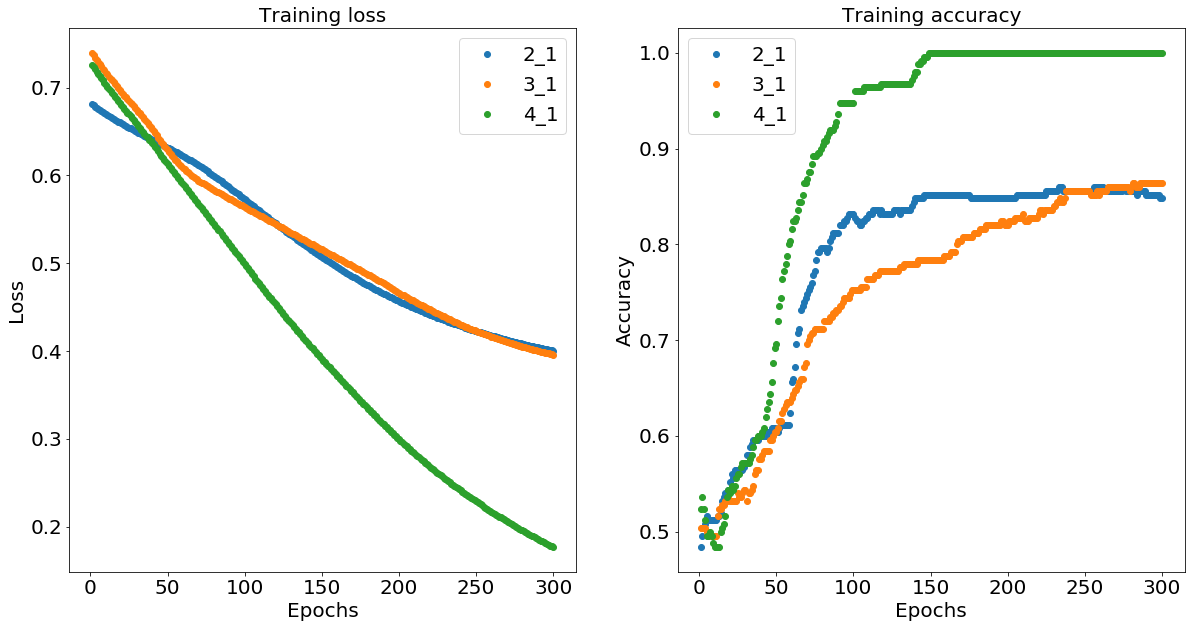

In [8]:
plt.figure(figsize=(20,10))
plot_loss_acc(history_2_1['loss'], history_2_1['acc'],
              ['Training loss','Training accuracy'],['2_1','3_1','4_1'])
plot_loss_acc(history_3_1['loss'], history_3_1['acc'],
              ['Training loss','Training accuracy'],['2_1','3_1','4_1'])
plot_loss_acc(history_4_1['loss'], history_4_1['acc'],
              ['Training loss','Training accuracy'],['2_1','3_1','4_1'])
plt.show()

In [42]:
def custom_div_cmap(numcolors=11, name='custom_div_cmap',
                    mincol='red', midcol='white', maxcol='blue'):
    """ Create a custom diverging colormap with three colors
    
    Default is blue to white to red with 11 colors.  Colors can be specified
    in any way understandable by matplotlib.colors.ColorConverter.to_rgb()
    """

    from matplotlib.colors import LinearSegmentedColormap 
    
    cmap = LinearSegmentedColormap.from_list(name=name, 
                                             colors =[mincol, midcol, maxcol],
                                             N=numcolors)
    return cmap

In [91]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(func, X, y, figsize=(20, 10)):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    c = func(ab)
    cc = c.reshape(aa.shape)
    #cm = plt.cm.RdBu
    
    fig, ax = plt.subplots(figsize=figsize)
    bounds =  np.linspace(0,1,12) #[0, 0.2, 0.4, 0.6, 0.8, 1]
    plt.contourf(aa, bb, cc, cmap = custom_div_cmap(11), alpha=0.4, vmin=0, vmax=1)
    plt.colorbar(values = bounds, spacing='proportional')
    #cbar = fig.colorbar(contour)
    #cbar.ax.set_yticklabels(bounds) 
    #cbar.ax.tick_params(labelsize=20)
    
    
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.scatter(X[y==0,0], X[y==0,1],c='r', s=200, alpha=0.7)
    plt.scatter(X[y==1,0], X[y==1,1],c='b', s=200, alpha=0.7)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlim(amin, amax)
    plt.ylim(bmin, bmax)

    plt.grid('on')

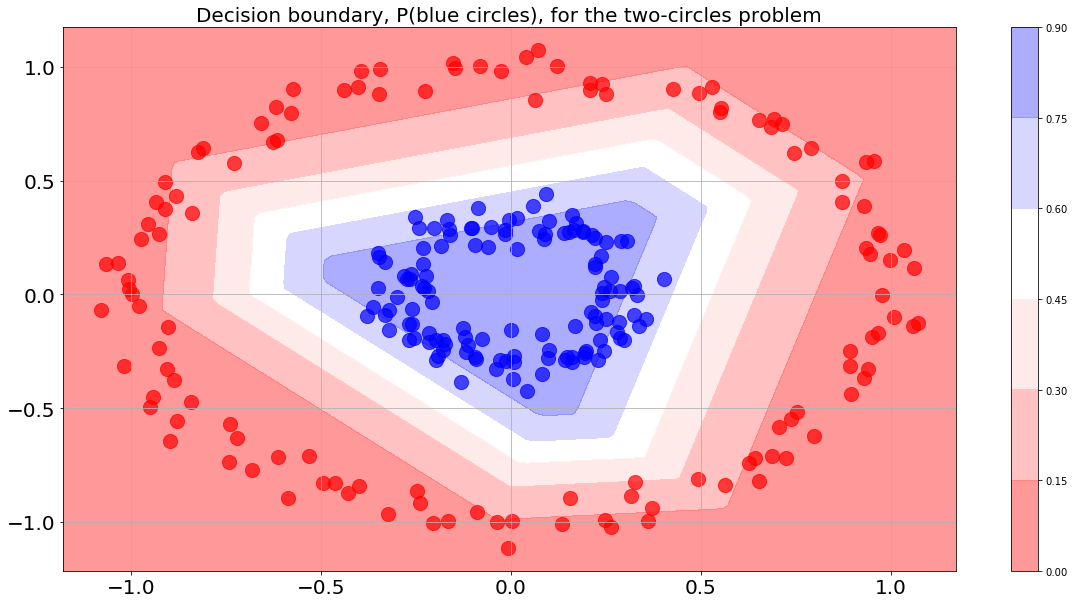

In [92]:
plot_decision_boundary(lambda x: model_4_1.predict(x), X, y)
plt.title('Decision boundary, P(blue circles), for the two-circles problem',fontsize=20)
plt.show()

In [11]:
bounds

NameError: name 'bounds' is not defined